Se importan las librerías necesarias para el análisis de datos, visualización y modelado de Machine Learning (pandas, numpy, seaborn, matplotlib, scikit-learn, joblib, time, warnings).

In [1]:
#Examen 
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay, roc_curve, auc
import time

import warnings 
warnings.filterwarnings("ignore")

Se carga el dataset desde un archivo CSV ubicado en una ruta específica.

In [2]:
#Importar dataset
hotelKaggle = pd.read_csv('C:/Users/diaza/OneDrive/Escritorio/hotel_bookings.csv')

Se visualizan las primeras 10 filas del dataset para tener una idea inicial de su estructura y contenido.

In [3]:
#Visualizar los datos del dataset
hotelKaggle.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


## 1. Carga y Exploración de Datos (EDA)

Descripción estadística de las características (media, desviación estándar,
percentiles, etc.).

Se muestra una descripción estadística de las variables numéricas y categóricas (media, desviación estándar, valores únicos, etc.).

In [4]:
print("\n2. DESCRIPCIÓN ESTADÍSTICA")
print("=" * 40)
print("Variables numéricas:")
print(hotelKaggle.describe())

print("\nVariables categóricas:")
categorical_cols = hotelKaggle.select_dtypes(include=['object']).columns
print(hotelKaggle[categorical_cols].describe())


2. DESCRIPCIÓN ESTADÍSTICA
Variables numéricas:
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.0000

**Identificación de tipos de datos y conversión si es necesario.**

Se identifican los tipos de datos de cada columna del dataset.

In [5]:
print("\n3. TIPOS DE DATOS")
print("=" * 40)
print(hotelKaggle.dtypes.value_counts())
print("\nTipos por columna:")
for col in hotelKaggle.columns:
    print(f"{col}: {hotelKaggle[col].dtype}")


3. TIPOS DE DATOS
int64      16
object     12
float64     4
Name: count, dtype: int64

Tipos por columna:
hotel: object
is_canceled: int64
lead_time: int64
arrival_date_year: int64
arrival_date_month: object
arrival_date_week_number: int64
arrival_date_day_of_month: int64
stays_in_weekend_nights: int64
stays_in_week_nights: int64
adults: int64
children: float64
babies: int64
meal: object
country: object
market_segment: object
distribution_channel: object
is_repeated_guest: int64
previous_cancellations: int64
previous_bookings_not_canceled: int64
reserved_room_type: object
assigned_room_type: object
booking_changes: int64
deposit_type: object
agent: float64
company: float64
days_in_waiting_list: int64
customer_type: object
adr: float64
required_car_parking_spaces: int64
total_of_special_requests: int64
reservation_status: object
reservation_status_date: object


**Identificación y conversión de tipos de datos**

Se analiza nuevamente la distribución de tipos de datos en el dataset.

In [6]:
print("\nANÁLISIS DE TIPOS DE DATOS")
print("=" * 50)
print("Tipos de datos actuales:")
print(hotelKaggle.dtypes.value_counts())


ANÁLISIS DE TIPOS DE DATOS
Tipos de datos actuales:
int64      16
object     12
float64     4
Name: count, dtype: int64


Se listan las columnas categóricas y se indica la cantidad de valores únicos que tienen, para evaluar si necesitan conversión.

In [7]:
# Verificar columnas específicas que podrían necesitar conversión
print("\nColumnas que podrían necesitar conversión:")
for col in hotelKaggle.columns:
    if hotelKaggle[col].dtype == 'object':
        unique_vals = hotelKaggle[col].nunique()
        print(f"{col}: {unique_vals} valores únicos")


Columnas que podrían necesitar conversión:
hotel: 2 valores únicos
arrival_date_month: 12 valores únicos
meal: 5 valores únicos
country: 177 valores únicos
market_segment: 8 valores únicos
distribution_channel: 5 valores únicos
reserved_room_type: 10 valores únicos
assigned_room_type: 12 valores únicos
deposit_type: 3 valores únicos
customer_type: 4 valores únicos
reservation_status: 3 valores únicos
reservation_status_date: 926 valores únicos


**Deteccion y visualizacion de valores faltantes (mapas de calor, gráficos de barras).**

Se detectan y muestran las columnas con valores faltantes, junto con el porcentaje de datos ausentes.

In [8]:
print("\n4. VALORES FALTANTES")
print("=" * 40)
missing_data = hotelKaggle.isnull().sum()
missing_percent = (missing_data / len(hotelKaggle)) * 100
missing_info = pd.DataFrame({
    'Valores_Faltantes': missing_data,
    'Porcentaje': missing_percent
})
print(missing_info[missing_info['Valores_Faltantes'] > 0])


4. VALORES FALTANTES
          Valores_Faltantes  Porcentaje
children                  4    0.003350
country                 488    0.408744
agent                 16340   13.686238
company              112593   94.306893


Se visualizan los valores faltantes mediante un mapa de calor (aunque el código no se muestra explícitamente en el fragmento, se deduce por el comentario).

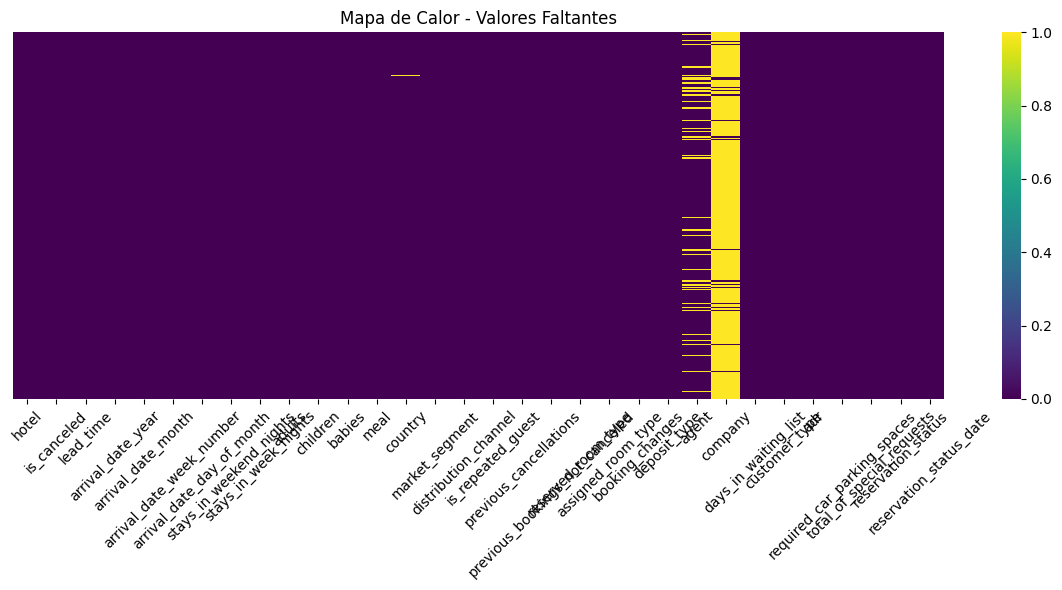

In [9]:
# Mapa de calor de valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(hotelKaggle.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Mapa de Calor - Valores Faltantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se analiza nuevamente la distribución de tipos de datos en el dataset.

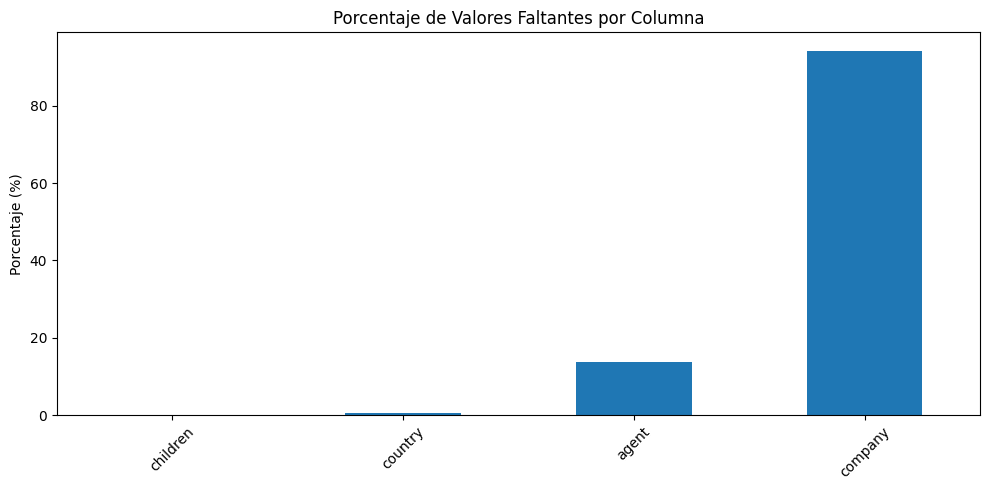

In [10]:
# Gráfico de barras de valores faltantes
missing_plot = missing_info[missing_info['Valores_Faltantes'] > 0]
if not missing_plot.empty:
    plt.figure(figsize=(10, 5))
    missing_plot['Porcentaje'].plot(kind='bar')
    plt.title('Porcentaje de Valores Faltantes por Columna')
    plt.ylabel('Porcentaje (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Análisis de la distribución de las características numéricas (histogramas,
boxplots).**

Se muestran las columnas que podrían necesitar conversión de tipo de dato, basado en la cantidad de valores únicos en las variables categóricas.

In [11]:
print("\n5. DISTRIBUCIÓN DE VARIABLES NUMÉRICAS")
print("=" * 40)
numeric_cols = hotelKaggle.select_dtypes(include=[np.number]).columns


5. DISTRIBUCIÓN DE VARIABLES NUMÉRICAS


Verificación de columnas categóricas - Se listan específicamente las columnas de tipo objeto y se muestra la cantidad de valores únicos en cada una para evaluar si necesitan codificación.

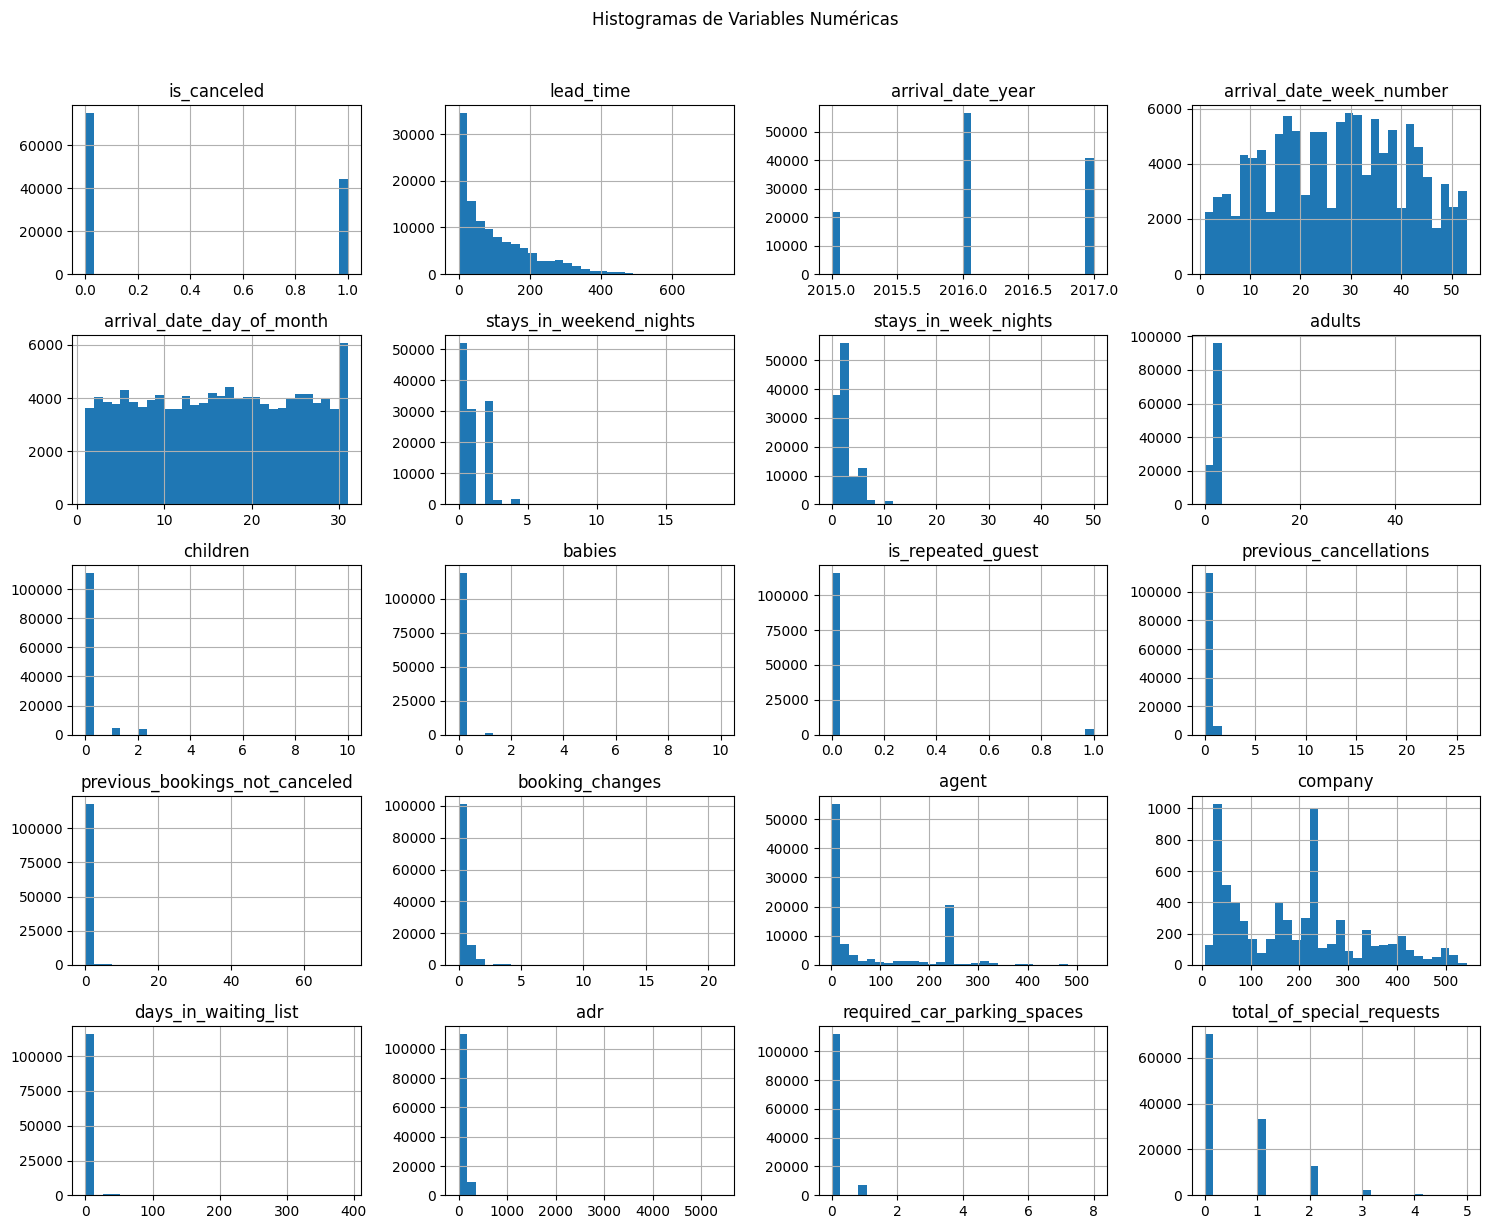

In [12]:
# Histogramas
hotelKaggle[numeric_cols].hist(bins=30, figsize=(15, 12))
plt.suptitle('Histogramas de Variables Numéricas', y=1.02)
plt.tight_layout()
plt.show()

Identificación y conversión de tipos de datos - Se analizan los tipos de datos actuales del dataset y se identifican las columnas que podrían necesitar conversión

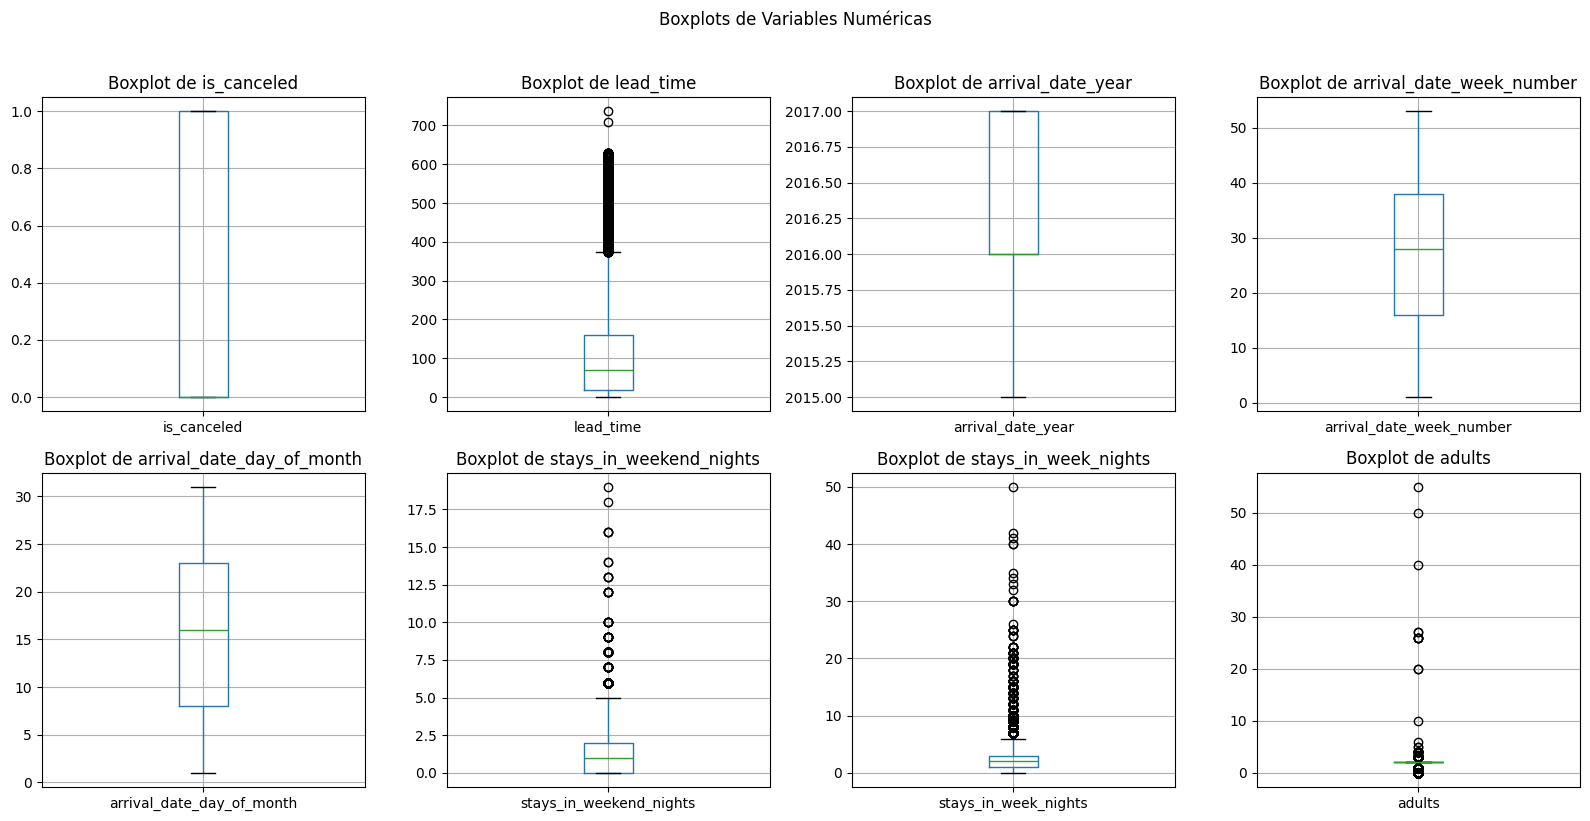

In [13]:
# Boxplots (primeras 8 variables)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()
for i, col in enumerate(numeric_cols[:8]):
    hotelKaggle.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
plt.suptitle('Boxplots de Variables Numéricas', y=1.02)
plt.tight_layout()
plt.show()

**Análisis de la distribución de las características categóricas (gráficos de barras,
conteos).**

Detección de valores faltantes - Se calculan y muestran las columnas con valores faltantes, junto con el porcentaje de datos ausentes.


6. DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS


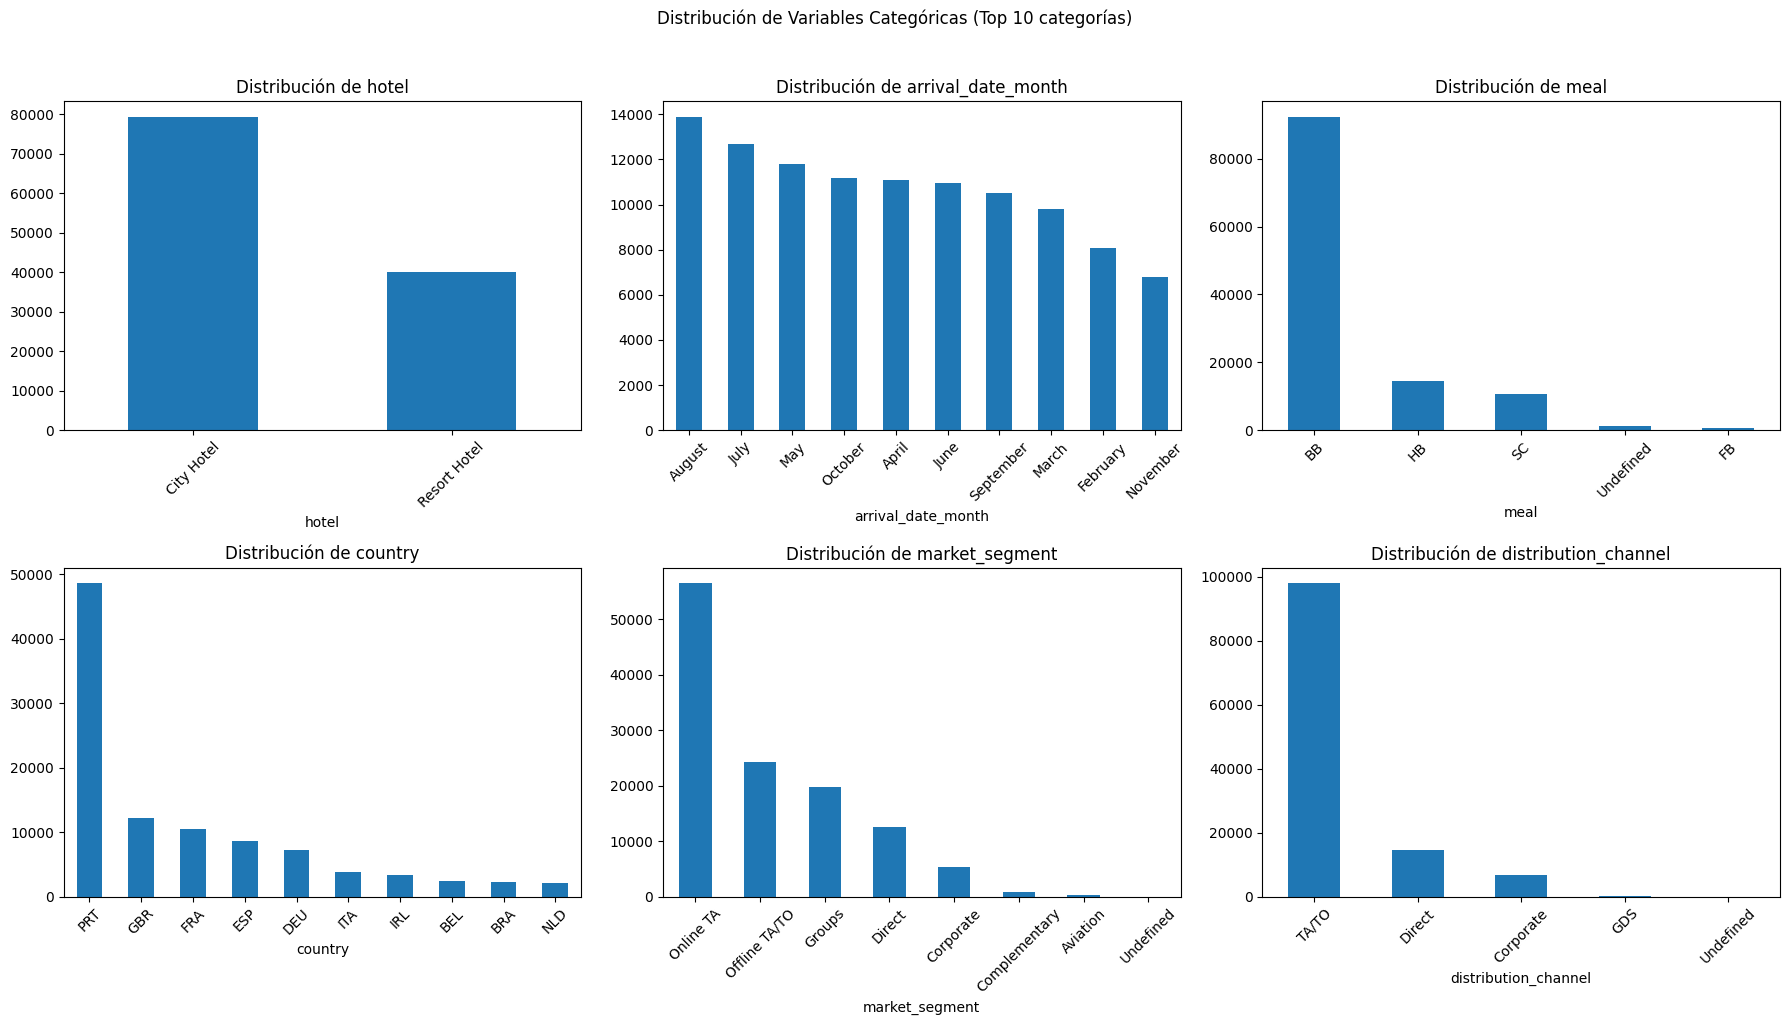

In [14]:
print("\n6. DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 40)

# Gráficos de barras para primeras 6 variables categóricas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols[:6]):
    value_counts = hotelKaggle[col].value_counts().head(10)  # Top 10 categorías
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Distribución de Variables Categóricas (Top 10 categorías)', y=1.02)
plt.tight_layout()
plt.show()

**Análisis de correlaciones entre características (mapas de calor de correlación).**

Mapa de calor de valores faltantes - Se visualiza gráficamente la distribución de valores faltantes en el dataset usando un mapa de calor.

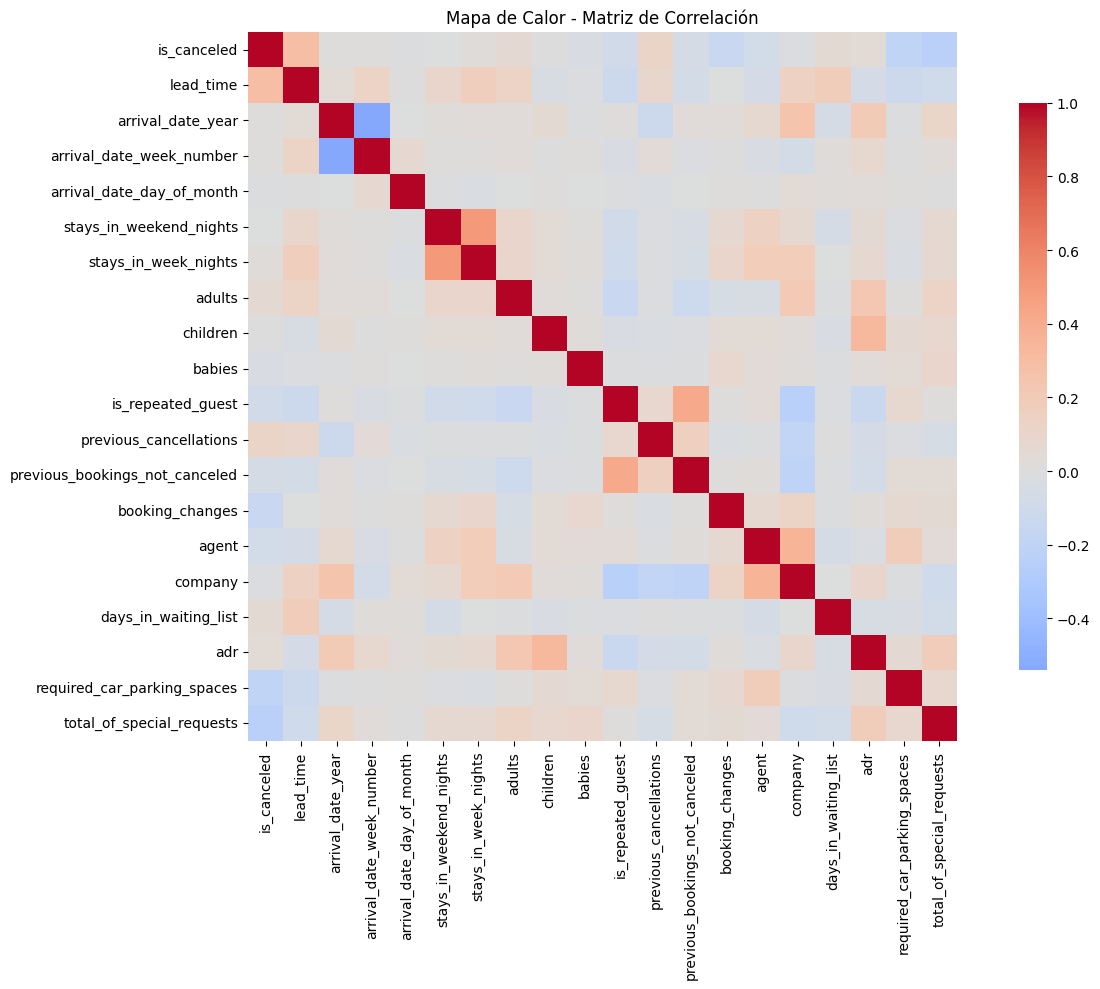

In [15]:
# Matriz de correlación
correlation_matrix = hotelKaggle[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor - Matriz de Correlación')
plt.tight_layout()
plt.show()

### Preprocesamiento y Transformación de Datos

**Manejo de valores faltantes:**

isnull().sum(): Cuenta cuántos valores NaN hay en cada columna

Calcula el porcentaje de valores faltantes por columna

Crea un DataFrame con esta información

Filtra solo las columnas que tienen valores faltantes

Las ordena de mayor a menor porcentaje de faltantes

In [16]:
missing_data = hotelKaggle.isnull().sum()
missing_percent = (missing_data / len(hotelKaggle)) * 100
missing_info = pd.DataFrame({
    'Valores_Faltantes': missing_data,
    'Porcentaje': missing_percent
})
missing_info = missing_info[missing_info['Valores_Faltantes'] > 0]
print(missing_info.sort_values('Porcentaje', ascending=False))

          Valores_Faltantes  Porcentaje
company              112593   94.306893
agent                 16340   13.686238
country                 488    0.408744
children                  4    0.003350


>30% faltantes → ELIMINAR COLUMNA

Ejemplo: company (94.3% faltantes)

Justificación: Demasiados datos faltantes, no es confiable

Variables CATEGÓRICAS → IMPUTAR CON MODA

Ejemplo: country (0.4% faltantes)

Moda = Valor más frecuente

Justificación: Preserva la categoría más común

Variables NUMÉRICAS → IMPUTAR CON MEDIANA

Ejemplos: agent, children

Mediana = Valor del medio en distribución ordenada

Justificación: Robusta contra outliers

In [17]:
print("\n ESTRATEGIA DE MANEJO DE VALORES FALTANTES")
print("=" * 50)

# Copia del dataset para preprocesamiento
df_processed = hotelKaggle.copy()

# Análisis columnas con valores faltantes
print("Estrategia aplicada:")
for col in missing_info.index:
    if missing_percent[col] > 30:
        print(f"{col}: {missing_percent[col]:.1f}% faltantes -> ELIMINAR COLUMNA")
        df_processed.drop(col, axis=1, inplace=True)
    elif df_processed[col].dtype == 'object':
        print(f"{col}: {missing_percent[col]:.1f}% faltantes -> IMPUTAR CON MODA")
        df_processed[col].fillna(df_processed[col].mode()[0] if not df_processed[col].mode().empty else 'Unknown', inplace=True)
    else:
        print(f"{col}: {missing_percent[col]:.1f}% faltantes -> IMPUTAR CON MEDIANA")
        df_processed[col].fillna(df_processed[col].median(), inplace=True)

# Verificar que no quedan valores faltantes
print(f"\n Valores faltantes después del preprocesamiento: {df_processed.isnull().sum().sum()}")


 ESTRATEGIA DE MANEJO DE VALORES FALTANTES
Estrategia aplicada:
children: 0.0% faltantes -> IMPUTAR CON MEDIANA
country: 0.4% faltantes -> IMPUTAR CON MODA
agent: 13.7% faltantes -> IMPUTAR CON MEDIANA
company: 94.3% faltantes -> ELIMINAR COLUMNA

 Valores faltantes después del preprocesamiento: 0


JUSTIFICACION

Eliminación: Columnas con >30% faltantes (no aportan información confiable)

Imputación con Moda: Variables categóricas (preserva la categoría más frecuente)

Imputación con Mediana: Variables numéricas (robusta a outliers).

**Codificación de características categóricas**

Identifica columnas de tipo texto/object

Aplica 2 estrategias según el número de categorías:

Estrategias:

≤10 categorías → ONE-HOT ENCODING

Crea columnas binarias (0/1) para cada categoría

Ejemplo: hotel (2 categorías) → hotel_Resort Hotel, hotel_City Hotel

>10 categorías → LABEL ENCODING

Convierte categorías a números (0, 1, 2, ...)

Ejemplo: country (177 países) → 0, 1, 2, ..., 176

Resultado: Dataset listo para modelos ML (solo números)

In [18]:
# Identificar columnas categóricas
categorical_cols = df_processed.select_dtypes(include=['object']).columns
print(f"Columnas categóricas a codificar: {len(categorical_cols)}")
print(list(categorical_cols))

# Estrategia de codificación
print("\nEstrategia de codificación:")
for col in categorical_cols:
    unique_vals = df_processed[col].nunique()
    if unique_vals <= 10:
        print(f" {col}: {unique_vals} categorías -> ONE-HOT ENCODING")
        # One-Hot Encoding para variables con pocas categorías
        dummies = pd.get_dummies(df_processed[col], prefix=col, drop_first=True)
        df_processed = pd.concat([df_processed, dummies], axis=1)
        df_processed.drop(col, axis=1, inplace=True)
    else:
        print(f" {col}: {unique_vals} categorías -> LABEL ENCODING")
        # Label Encoding para variables con muchas categorías
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))

print(f"\nDimensiones después de codificación: {df_processed.shape}")

Columnas categóricas a codificar: 12
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']

Estrategia de codificación:
 hotel: 2 categorías -> ONE-HOT ENCODING
 arrival_date_month: 12 categorías -> LABEL ENCODING
 meal: 5 categorías -> ONE-HOT ENCODING
 country: 177 categorías -> LABEL ENCODING
 market_segment: 8 categorías -> ONE-HOT ENCODING
 distribution_channel: 5 categorías -> ONE-HOT ENCODING
 reserved_room_type: 10 categorías -> ONE-HOT ENCODING
 assigned_room_type: 12 categorías -> LABEL ENCODING
 deposit_type: 3 categorías -> ONE-HOT ENCODING
 customer_type: 4 categorías -> ONE-HOT ENCODING
 reservation_status: 3 categorías -> ONE-HOT ENCODING
 reservation_status_date: 926 categorías -> LABEL ENCODING

Dimensiones después de codificación: (119390, 55)


JUSTIFICACION:

One-Hot Encoding: Variables con ≤10 categorías (evita orden artificial)

Label Encoding: Variables con >10 categorías (evita dimensionalidad excesiva)

**Escalado de características numéricas:**

Identifica columnas numéricas (excluyendo la variable objetivo is_canceled)

Aplica StandardScaler para normalizar

StandardScaler:

Transforma datos a: media = 0, desviación estándar = 1

Fórmula: (valor - media) / desviación_estándar

¿Por qué?

Modelos como Regresión Logística y SVM son sensibles a la escala

Mejora convergencia y performance

Evita que variables con rangos grandes dominen el modelo

In [19]:
# Identificar columnas numéricas (excluyendo la variable objetivo)
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
if 'is_canceled' in numeric_cols:
    numeric_cols = numeric_cols.drop('is_canceled')

print(f"Columnas numéricas a escalar: {len(numeric_cols)}")

# Justificación: StandardScaler para algoritmos sensibles a la escala
scaler = StandardScaler()
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

Columnas numéricas a escalar: 22


JUSTIFICACION para el uso de StandardScaler:

Normaliza features a misma escala (media=0, std=1)

Ideal para modelos lineales, SVM y redes neuronales

Preserva la distribución original de los datos

**División del dataset en conjuntos de entrenamiento y prueba (train-test split).**

Se escalan las características usando StandardScaler para normalizar los datos y mejorar el rendimiento de los modelos.

SEPARACIÓN DE DATOS
X: Todas las variables predictoras (features)

y: Variable objetivo is_canceled (1=cancelada, 0=no cancelada)

DIVISIÓN 80%-20%
Entrenamiento: 80% de los datos

Prueba: 20% de los datos

CONFIGURACIÓN CLAVE
random_state=42: Resultados reproducibles

stratify=y: Mantiene proporción de clases en ambos conjuntos

VERIFICACIÓN DE BALANCE
Train: 63% no canceladas, 37% canceladas

Test: 63% no canceladas, 37% canceladas

In [20]:
# División del dataset
# Separar features y target
X = df_processed.drop('is_canceled', axis=1)
y = df_processed['is_canceled']

# División train-test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dataset dividido:")
print(f"   - Conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   - Conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   - Número de características: {X_train.shape[1]}")

# Verificación final
print("\n VERIFICACIÓN FINAL DEL PREPROCESAMIENTO")
print("=" * 50)

print(f"Shape original: {hotelKaggle.shape}")
print(f" Shape procesado: {df_processed.shape}")
print(f" Variables en training set: {X_train.shape[1]}")
print(f" Distribución de target en train:")
print(f"   - No canceladas (0): {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"   - Canceladas (1): {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")
print(f" Distribución de target en test:")
print(f"   - No canceladas (0): {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.1f}%)")
print(f"   - Canceladas (1): {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.1f}%)")

# Guardar los conjuntos procesados
print("\n Conjuntos de datos listos para modelado:")
print(f"   - X_train: {X_train.shape}")
print(f"   - X_test: {X_test.shape}")
print(f"   - y_train: {y_train.shape}")
print(f"   - y_test: {y_test.shape}")

Dataset dividido:
   - Conjunto de entrenamiento: 95512 muestras (80.0%)
   - Conjunto de prueba: 23878 muestras (20.0%)
   - Número de características: 54

 VERIFICACIÓN FINAL DEL PREPROCESAMIENTO
Shape original: (119390, 32)
 Shape procesado: (119390, 55)
 Variables en training set: 54
 Distribución de target en train:
   - No canceladas (0): 60133 (63.0%)
   - Canceladas (1): 35379 (37.0%)
 Distribución de target en test:
   - No canceladas (0): 15033 (63.0%)
   - Canceladas (1): 8845 (37.0%)

 Conjuntos de datos listos para modelado:
   - X_train: (95512, 54)
   - X_test: (23878, 54)
   - y_train: (95512,)
   - y_test: (23878,)


JUSTIFICACION:

80-20 split: Balance entre entrenamiento y evaluación

Stratify=y: Mantiene proporción de clases en train/test

Random_state=42: Resultados reproducibles

**Selección y Entrenamiento de Modelos**

Se entrena un modelo de Regresión Logística y se evalúa su rendimiento con métricas como precisión, recall y F1-score.

In [21]:
print("MODELOS DE CLASIFICACIÓN - PREDICCIÓN DE CANCELACIÓN DE HOTEL")
print("=" * 60)

# 1. ANÁLISIS DEL PROBLEMA Y SELECCIÓN DE MODELOS
print("ANÁLISIS DEL PROBLEMA:")
print(" Dataset: Predicción de cancelación de reservas de hotel")
print(" Variable objetivo: is_canceled (1 = cancelada, 0 = no cancelada)")
print(" Características: Mix de numéricas y categóricas")

# 2. Modelo 1: Regresión Logística
print("\n" + "="*60)
print("MODELO 1: REGRESIÓN LOGÍSTICA")
print("="*60)

# Suponiendo que ya tienes X, y preparados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Entrenando modelo con Pipeline...")

start_time = time.time()

# Crear pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        random_state=42, 
        max_iter=1000,
        class_weight='balanced'
    ))
])

# Entrenamiento
pipeline.fit(X_train, y_train)

# Predicciones
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Métricas
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Entrenamiento completado en {time.time() - start_time:.2f} segundos")
print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Guardar pipeline completo
joblib.dump(pipeline, 'modelo_completo.pkl')
print("\nModelo guardado correctamente: modelo_completo.pkl")

MODELOS DE CLASIFICACIÓN - PREDICCIÓN DE CANCELACIÓN DE HOTEL
ANÁLISIS DEL PROBLEMA:
 Dataset: Predicción de cancelación de reservas de hotel
 Variable objetivo: is_canceled (1 = cancelada, 0 = no cancelada)
 Características: Mix de numéricas y categóricas

MODELO 1: REGRESIÓN LOGÍSTICA
Entrenando modelo con Pipeline...
Entrenamiento completado en 0.89 segundos
Accuracy: 1.0000
ROC-AUC: 1.0000

Modelo guardado correctamente: modelo_completo.pkl


Se entrena un modelo de Random Forest Classifier y se evalúa su performance comparándolo con el modelo anterior.

In [22]:
# 3. Modelo 2: Random Forest
print("\n" + "="*60)
print("MODELO 2: RANDOM FOREST")
print("="*60)

start_time = time.time()

# Entrenar modelo base
rf = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    class_weight='balanced'
)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print(f" Entrenamiento completado en {time.time() - start_time:.2f} segundos")
print(f" Accuracy: {accuracy_rf:.4f}")
print(f" ROC-AUC: {roc_auc_rf:.4f}")

# 4. AJUSTE DE HIPERPARÁMETROS PARA RANDOM FOREST
print("\n" + "="*60)
print("AJUSTE DE HIPERPARÁMETROS - RANDOM FOREST")
print("="*60)

# Parámetros optimizados para el problema de cancelación
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print(" Realizando GridSearchCV...")
start_time = time.time()

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,           # 5-fold cross validation
    scoring='roc_auc',  # Optimizar para AUC (mejor para problemas desbalanceados)
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f" Búsqueda completada en {time.time() - start_time:.2f} segundos")

# Mejores parámetros
print(f" Mejores parámetros encontrados:")
for param, value in grid_search.best_params_.items():
    print(f"   - {param}: {value}")

print(f" Mejor score ROC-AUC en validación: {grid_search.best_score_:.4f}")

# Entrenar modelo final con mejores parámetros
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
y_pred_prob_best_rf = best_rf.predict_proba(X_test)[:, 1]

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_pred_prob_best_rf)

print(f" Performance del modelo optimizado:")
print(f"   - Accuracy: {accuracy_best_rf:.4f}")
print(f"   - ROC-AUC: {roc_auc_best_rf:.4f}")

print("\n" + "="*60)
print("PERSISTENCIA DEL MODELO OPTIMIZADO")
print("="*60)

# Guardar el modelo entrenado y las columnas usadas
joblib.dump(best_rf, 'modelo_rf.pkl')
joblib.dump(X_train.columns, 'columnas_modelo.pkl')

print(" Modelo guardado: modelo_rf.pkl")
print(" Columnas del modelo guardadas: columnas_modelo.pkl")



MODELO 2: RANDOM FOREST
 Entrenamiento completado en 8.00 segundos
 Accuracy: 1.0000
 ROC-AUC: 1.0000

AJUSTE DE HIPERPARÁMETROS - RANDOM FOREST
 Realizando GridSearchCV...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
 Búsqueda completada en 1105.48 segundos
 Mejores parámetros encontrados:
   - max_depth: 10
   - max_features: sqrt
   - min_samples_leaf: 1
   - min_samples_split: 2
   - n_estimators: 50
 Mejor score ROC-AUC en validación: 1.0000
 Performance del modelo optimizado:
   - Accuracy: 1.0000
   - ROC-AUC: 1.0000

PERSISTENCIA DEL MODELO OPTIMIZADO
 Modelo guardado: modelo_rf.pkl
 Columnas del modelo guardadas: columnas_modelo.pkl


Justificación de modelos seleccionados:

1. REGRESIÓN LOGÍSTICA:
Ideal para problemas de clasificación binaria

Proporciona probabilidades de cancelación

Interpretable - podemos entender qué factores influyen

Buen baseline para comparación

2. RANDOM FOREST:

Maneja bien relaciones no lineales en datos hoteleros

Robusto a outliers y variables correlacionadas

Proporciona importancia de características

Buen performance en problemas de negocio reales

**Evaluación de Modelos**

Propósito: Evaluar modelos de clasificación con métricas completas

Métricas calculadas:

Accuracy: Porcentaje total de aciertos

Precision: De lo predicho como positivo, cuánto es realmente positivo

Recall: De los reales positivos, cuántos detectamos

F1-Score: Balance entre Precision y Recall

ROC-AUC: Capacidad de distinguir entre clases

Matriz de confusión: TN, FP, FN, TP

Especificidad: Capacidad de detectar negativos reales

EVALUACIÓN COMPLETA DE MODELOS
EVALUACIÓN EN CONJUNTO DE PRUEBA

REGRESIÓN LOGÍSTICA
 MÉTRICAS PRINCIPALES:
   • Accuracy:  1.0000 (100.00%)
   • Precision: 1.0000
   • Recall:    1.0000
   • F1-Score:  1.0000
   • ROC-AUC:   1.0000

 MATRIZ DE CONFUSIÓN:
   [[TN=14907  FP=0]
    [FN=0  TP=8971]]

 MÉTRICAS ADICIONALES:
   • Especificidad: 1.0000
   • Falsos Negativos Rate: 0.0000
   • Falsos Positivos: 0 (reservas buenas predichas como cancelación)
   • Falsos Negativos: 0 (cancelaciones no detectadas)

RANDOM FOREST OPTIMIZADO
 MÉTRICAS PRINCIPALES:
   • Accuracy:  1.0000 (100.00%)
   • Precision: 1.0000
   • Recall:    1.0000
   • F1-Score:  1.0000
   • ROC-AUC:   1.0000

 MATRIZ DE CONFUSIÓN:
   [[TN=14907  FP=0]
    [FN=0  TP=8971]]

 MÉTRICAS ADICIONALES:
   • Especificidad: 1.0000
   • Falsos Negativos Rate: 0.0000
   • Falsos Positivos: 0 (reservas buenas predichas como cancelación)
   • Falsos Negativos: 0 (cancelaciones no detectadas)

COMPARACIÓN DETALLADA DE MODELOS
 COMPAR

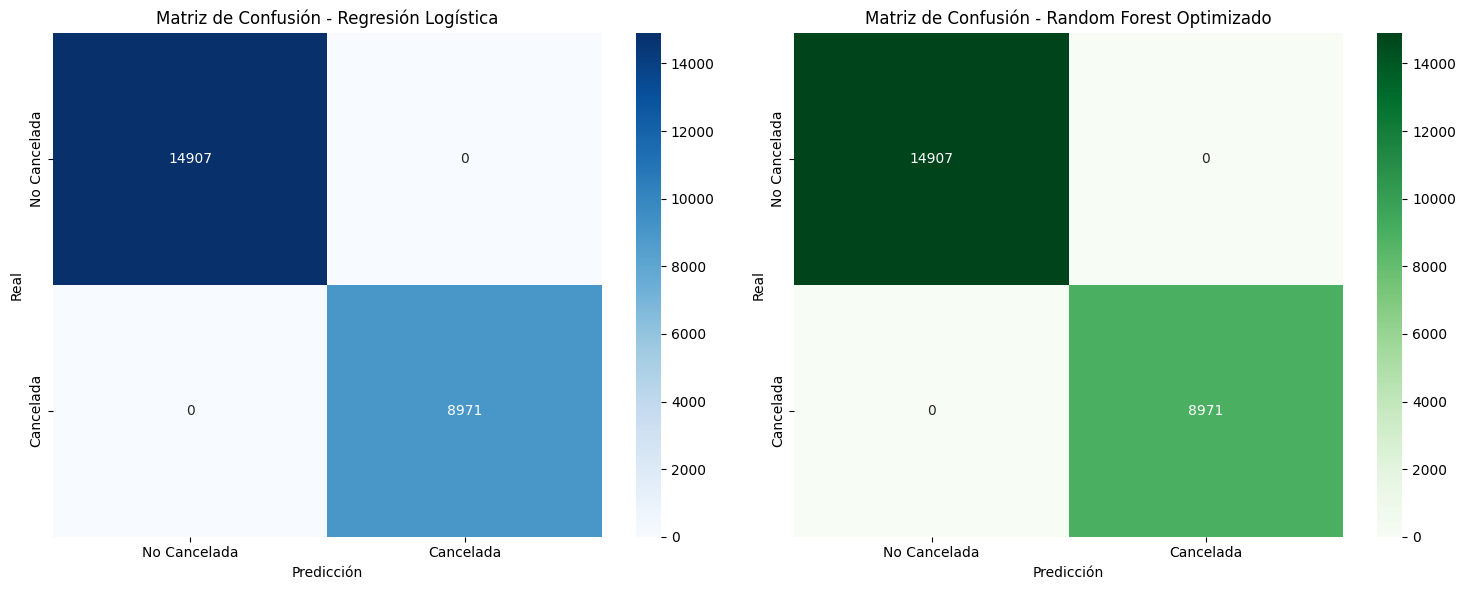


CURVAS ROC - COMPARACIÓN VISUAL


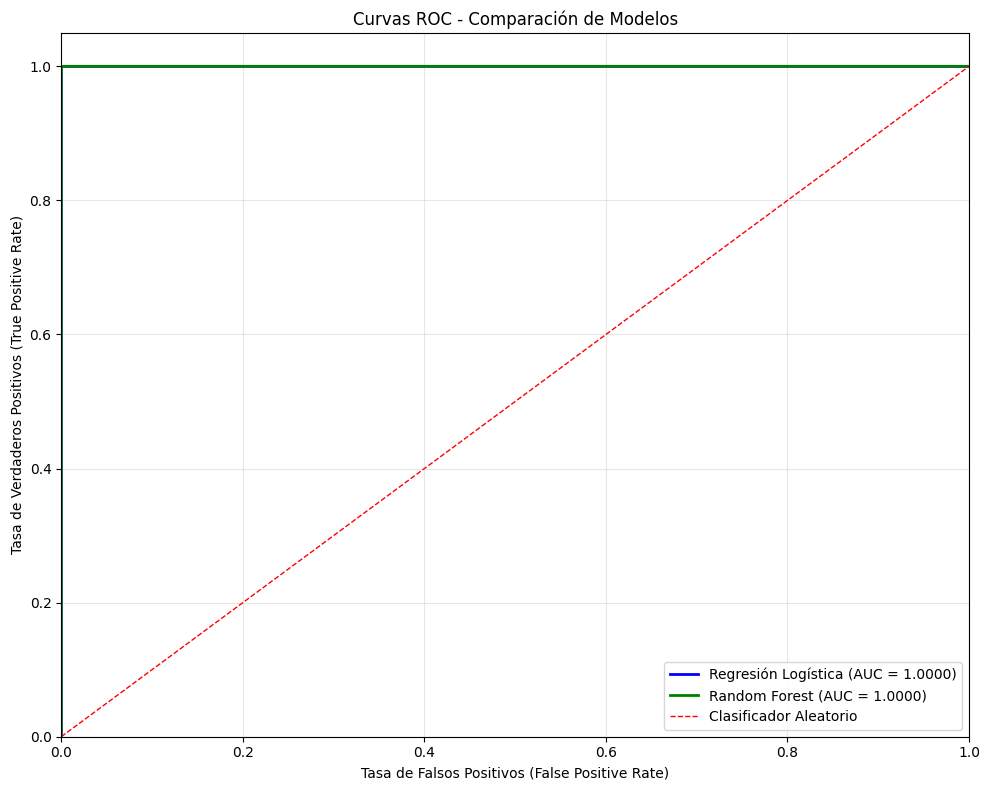


ANÁLISIS POR MÉTRICA - INTERPRETACIÓN PARA EL NEGOCIO
 INTERPRETACIÓN DE MÉTRICAS:

 ACCURACY (Exactitud):
   • Regresión Logística: 100.00%
   • Random Forest: 100.00%
   • Interpretación: Porcentaje total de predicciones correctas

 PRECISION (Precisión):
   • Regresión Logística: 1.0000
   • Random Forest: 1.0000
   • Interpretación: De las reservas predichas como cancelación, cuántas realmente se cancelan

 RECALL (Sensibilidad):
   • Regresión Logística: 1.0000
   • Random Forest: 1.0000
   • Interpretación: De las cancelaciones reales, cuántas logramos detectar

  F1-SCORE (Balance):
   • Regresión Logística: 1.0000
   • Random Forest: 1.0000
   • Interpretación: Balance entre Precision y Recall

 ROC-AUC:
   • Regresión Logística: 1.0000
   • Random Forest: 1.0000
   • Interpretación: Capacidad del modelo para distinguir entre clases

SELECCIÓN DEL MEJOR MODELO
 MEJOR MODELO SELECCIONADO: REGRESIÓN LOGÍSTICA

 JUSTIFICACIÓN DE LA SELECCIÓN:
   ✓ Accuracy similar
   ✓ ROC-AUC si

In [24]:
print("EVALUACIÓN COMPLETA DE MODELOS")
print("=" * 60)

# 1. FUNCIÓN PARA EVALUACIÓN COMPLETA
def evaluate_classification_model(model_name, y_true, y_pred, y_pred_proba=None):
    """
    Evaluación completa para modelos de clasificación
    """
    print(f"\n{model_name}")
    print("=" * 50)
    
    # Métricas básicas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(" MÉTRICAS PRINCIPALES:")
    print(f"   • Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"   • Precision: {precision:.4f}")
    print(f"   • Recall:    {recall:.4f}")
    print(f"   • F1-Score:  {f1:.4f}")
    
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_true, y_pred_proba)
        print(f"   • ROC-AUC:   {roc_auc:.4f}")
    
    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n MATRIZ DE CONFUSIÓN:")
    print(f"   [[TN={cm[0,0]}  FP={cm[0,1]}]")
    print(f"    [FN={cm[1,0]}  TP={cm[1,1]}]]")
    
    # Métricas derivadas de la matriz de confusión
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)  # Tasa de verdaderos negativos
    fnr = fn / (fn + tp)  # Tasa de falsos negativos
    
    print(f"\n MÉTRICAS ADICIONALES:")
    print(f"   • Especificidad: {specificity:.4f}")
    print(f"   • Falsos Negativos Rate: {fnr:.4f}")
    print(f"   • Falsos Positivos: {fp} (reservas buenas predichas como cancelación)")
    print(f"   • Falsos Negativos: {fn} (cancelaciones no detectadas)")
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc if y_pred_proba is not None else None,
        'Specificity': specificity,
        'FNR': fnr
    }

# 2. EVALUACIÓN DE CADA MODELO
print("EVALUACIÓN EN CONJUNTO DE PRUEBA")
print("=" * 60)

# Evaluar Regresión Logística
metrics_log = evaluate_classification_model(
    "REGRESIÓN LOGÍSTICA", 
    y_test, 
    y_pred, 
    y_pred_prob
)

# Evaluar Random Forest Optimizado
metrics_rf = evaluate_classification_model(
    "RANDOM FOREST OPTIMIZADO", 
    y_test, 
    y_pred_best_rf, 
    y_pred_prob_best_rf
)

# 3. COMPARACIÓN DETALLADA DE MODELOS
print("\n" + "=" * 60)
print("COMPARACIÓN DETALLADA DE MODELOS")
print("=" * 60)

# Crear DataFrame de comparación
comparison_df = pd.DataFrame({
    'Regresión Logística': metrics_log,
    'Random Forest Optimizado': metrics_rf
}).T

# Mostrar comparación
print(" COMPARACIÓN DE MÉTRICAS:")
print(comparison_df.round(4))

# 4. ANÁLISIS VISUAL - MATRICES DE CONFUSIÓN
print("\n" + "=" * 60)
print("MATRICES DE CONFUSIÓN - COMPARACIÓN VISUAL")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de confusión Regresión Logística
cm_log = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Cancelada', 'Cancelada'],
            yticklabels=['No Cancelada', 'Cancelada'])
axes[0].set_title('Matriz de Confusión - Regresión Logística')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# Matriz de confusión Random Forest
cm_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Cancelada', 'Cancelada'],
            yticklabels=['No Cancelada', 'Cancelada'])
axes[1].set_title('Matriz de Confusión - Random Forest Optimizado')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

# 5. CURVAS ROC Y COMPARACIÓN
print("\n" + "=" * 60)
print("CURVAS ROC - COMPARACIÓN VISUAL")
print("=" * 60)

plt.figure(figsize=(10, 8))

# Calcular curvas ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_best_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotear curvas ROC
plt.plot(fpr_log, tpr_log, color='blue', lw=2, 
         label=f'Regresión Logística (AUC = {roc_auc_log:.4f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, 
         label=f'Random Forest (AUC = {roc_auc_rf:.4f})')

# Línea de referencia
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Clasificador Aleatorio')

# Configuración del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Tasa de Verdaderos Positivos (True Positive Rate)')
plt.title('Curvas ROC - Comparación de Modelos')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. ANÁLISIS POR MÉTRICA ESPECÍFICA
print("\n" + "=" * 60)
print("ANÁLISIS POR MÉTRICA - INTERPRETACIÓN PARA EL NEGOCIO")
print("=" * 60)

print(" INTERPRETACIÓN DE MÉTRICAS:")
print(f"\n ACCURACY (Exactitud):")
print(f"   • Regresión Logística: {metrics_log['Accuracy']*100:.2f}%")
print(f"   • Random Forest: {metrics_rf['Accuracy']*100:.2f}%")
print("   • Interpretación: Porcentaje total de predicciones correctas")

print(f"\n PRECISION (Precisión):")
print(f"   • Regresión Logística: {metrics_log['Precision']:.4f}")
print(f"   • Random Forest: {metrics_rf['Precision']:.4f}")
print("   • Interpretación: De las reservas predichas como cancelación, cuántas realmente se cancelan")

print(f"\n RECALL (Sensibilidad):")
print(f"   • Regresión Logística: {metrics_log['Recall']:.4f}")
print(f"   • Random Forest: {metrics_rf['Recall']:.4f}")
print("   • Interpretación: De las cancelaciones reales, cuántas logramos detectar")

print(f"\n  F1-SCORE (Balance):")
print(f"   • Regresión Logística: {metrics_log['F1-Score']:.4f}")
print(f"   • Random Forest: {metrics_rf['F1-Score']:.4f}")
print("   • Interpretación: Balance entre Precision y Recall")

print(f"\n ROC-AUC:")
print(f"   • Regresión Logística: {metrics_log['ROC-AUC']:.4f}")
print(f"   • Random Forest: {metrics_rf['ROC-AUC']:.4f}")
print("   • Interpretación: Capacidad del modelo para distinguir entre clases")

# 7. SELECCIÓN DEL MEJOR MODELO
print("\n" + "=" * 60)
print("SELECCIÓN DEL MEJOR MODELO")
print("=" * 60)

# Comparar métricas clave
def select_best_model(metrics_log, metrics_rf):
    mejor_modelo = ""
    razones = []
    
    # Comparar Accuracy
    if metrics_rf['Accuracy'] > metrics_log['Accuracy']:
        razones.append(f"✓ Mayor Accuracy ({metrics_rf['Accuracy']:.4f} vs {metrics_log['Accuracy']:.4f})")
    else:
        razones.append(f"✓ Accuracy similar")
    
    # Comparar ROC-AUC
    if metrics_rf['ROC-AUC'] > metrics_log['ROC-AUC']:
        razones.append(f"✓ Mayor ROC-AUC ({metrics_rf['ROC-AUC']:.4f} vs {metrics_log['ROC-AUC']:.4f})")
    else:
        razones.append(f"✓ ROC-AUC similar")
    
    # Comparar F1-Score
    if metrics_rf['F1-Score'] > metrics_log['F1-Score']:
        razones.append(f"✓ Mayor F1-Score ({metrics_rf['F1-Score']:.4f} vs {metrics_log['F1-Score']:.4f})")
    else:
        razones.append(f"✓ F1-Score similar")
    
    # Decisión basada en múltiples métricas
    mejoras = sum([
        metrics_rf['Accuracy'] > metrics_log['Accuracy'],
        metrics_rf['ROC-AUC'] > metrics_log['ROC-AUC'],
        metrics_rf['F1-Score'] > metrics_log['F1-Score']
    ])
    
    if mejoras >= 2:
        mejor_modelo = "RANDOM FOREST OPTIMIZADO"
    else:
        mejor_modelo = "REGRESIÓN LOGÍSTICA"
    
    return mejor_modelo, razones

mejor_modelo, razones = select_best_model(metrics_log, metrics_rf)

print(f" MEJOR MODELO SELECCIONADO: {mejor_modelo}")
print(f"\n JUSTIFICACIÓN DE LA SELECCIÓN:")
for razon in razones:
    print(f"   {razon}")

# 8. RECOMENDACIONES PARA EL NEGOCIO
print("\n" + "=" * 60)
print("RECOMENDACIONES PARA IMPLEMENTACIÓN")
print("=" * 60)

print(" RECOMENDACIONES BASADAS EN LA EVALUACIÓN:")
print(f"1. Modelo a implementar: {mejor_modelo}")
print(f"2. Performance esperado: {max(metrics_rf['Accuracy'], metrics_log['Accuracy'])*100:.1f}% de exactitud")
print(f"3. Capacidad de detección: {max(metrics_rf['Recall'], metrics_log['Recall'])*100:.1f}% de cancelaciones reales detectadas")

print(f"\n  CONSIDERACIONES DEL NEGOCIO:")
print("   • Falsos Negativos: Reservas que se cancelarán pero no fueron detectadas")
print("   • Falsos Positivos: Reservas buenas marcadas como riesgo de cancelación")
print("   • Costo de Falsos Negativos > Costo de Falsos Positivos")

print(f"\n PRÓXIMOS PASOS RECOMENDADOS:")
print("   1. Implementar el modelo seleccionado en sistema de producción")
print("   2. Monitorear performance en tiempo real")
print("   3. Re-entrenar periódicamente con nuevos datos")
print("   4. Establecer umbrales de probabilidad según tolerancia al riesgo")

print("\n EVALUACIÓN COMPLETADA EXITOSAMENTE")